In [40]:
import pandas as pd
import json
from glob import glob
import seaborn as sns
%matplotlib inline

In [2]:
pd.set_option('display.max_colwidth', 255)

In [3]:
subjects = []
for media in ['France 3', 'France 2', 'TF1']:
    for year in ['2022']:
        for month in ['11']:
            month_path = f'../data-news-json/media={media}/year={year}/month={month}'
            day_files = glob(f'{month_path}/day=*/*.json')
            for day_file in day_files:
                for line in open(day_file):
                    subject = json.loads(line)
                    subject['media'] = media.lower().replace(' ', '')
                    subjects.append(subject)

In [18]:
data = pd.DataFrame(subjects)

In [19]:
data['date'] = pd.to_datetime(data['date'])

In [20]:
data.head()

,title,description,date,order,presenter,authors,editor,editorDeputy,url,urlTvNews,containsWordGlobalWarming,media
0,Santé : la bronchiolite touche aussi les adultes,"Contrairement aux idées reçues, la bronchiolite ne concerne pas que les enfants. Explications, mardi 15 novembre, sur le plateau du 12/13 avec le journaliste et médecin Damien Mascret.La bronchiolite, une atteinte respiratoire, avec une inflammation, ...",2022-11-15 00:00:00+00:00,9,Emilie Tran NGuyen,[D.Mascret],,[],https://www.francetvinfo.fr/sante/maladie/sante-la-bronchiolite-touche-aussi-les-adultes_5478747.html,https://www.francetvinfo.fr/replay-jt/france-3/12-13/jt-de-12-13-du-mardi-15-novembre-2022_5440393.html,False,france3
1,Crise énergétique : une marque de lingerie met en place la semaine de quatre jours,"Pour faire face à l’augmentation des coûts de l’énergie, la marque de lingerie Indiscrète a décidé de passer à la semaine de quatre jours.La marque Indiscrète a fait le choix de basculer sur une semaine à quatre jours afin de répondre aux problématiqu...",2022-11-15 00:00:00+00:00,1,Emilie Tran NGuyen,"[France 3 Poitou-Charentes, M. Jacob, S. Heriaud, A.Rouy]",,[],https://www.francetvinfo.fr/economie/energie/energie-la-semaine-de-quatre-jours-mise-en-place-par-la-marque-indiscrete_5478417.html,https://www.francetvinfo.fr/replay-jt/france-3/12-13/jt-de-12-13-du-mardi-15-novembre-2022_5440393.html,False,france3
2,Sécheresse : les restrictions d’eau prolongées jusqu’à la mi-décembre dans le Var,"Les restrictions d’utilisation de l’eau continueront dans 10 communes du pays de Fayence au moins jusqu’à la mi-décembre. Ce rationnement oblige des professionnels, notamment les agriculteurs, à trouver d’autres solutions pour arroser.Il n’y plus le m...",2022-11-15 00:00:00+00:00,4,"Carole Gaessler est disponible en direct et en replay ici. Le 19/20 Edition nationale suit l'édition de votre région, et propose après la présentation des titres, les reportages, les interviews et les témoignages en vidéos qui font le point sur toute ...","[C. Guyon, M. Meuneveaux, A. Dequidt, E. Jarlot]",,[],https://www.francetvinfo.fr/meteo/secheresse/secheresse-les-restrictions-d-eau-prolongees-jusqu-a-la-mi-decembre-dans-le-var_5479146.html,https://www.francetvinfo.fr/replay-jt/france-3/19-20/jt-de-19-20-du-mardi-15-novembre-2022_5440339.html,False,france3
3,Marseille : un restaurant ouvre ses portes dans la prison des Baumettes,"Pour la première fois, un restaurant s'installe dans une prison. Les ""Beaux Mets"" a ouvert au public mardi 15 novembre, dans le centre pénitentiaire des Baumettes à Marseille. L'expérience doit permettre de préparer les détenus à leur sortie.À Marseil...",2022-11-15 00:00:00+00:00,6,Emilie Tran NGuyen,"[E. Bonnasse, France 3 Provence-Alpes, M. Semerjian]",,[],https://www.francetvinfo.fr/societe/prisons/marseille-un-restaurant-ouvre-ses-portes-dans-la-prison-des-baumettes_5478735.html,https://www.francetvinfo.fr/replay-jt/france-3/12-13/jt-de-12-13-du-mardi-15-novembre-2022_5440393.html,False,france3
4,Emploi : Heineken va quitter le site de Schiltigheim,"Mardi 15 novembre, la société spécialisée dans la bière Heineken a annoncé qu’elle allait quitter le site de Schiltigheim. 220 emplois sont menacés.Une bien mauvaise nouvelle est tombée mardi 15 novembre pour les 220 employés du site de Schiltigheim (...",2022-11-15 00:00:00+00:00,2,Emilie Tran NGuyen,"[France 3 Alsace, M. Demazure, D. Meneu, M. Kelhetter, M. Ruch]",,[],https://www.francetvinfo.fr/economie/emploi/emploi-heineken-va-quitter-le-site-de-schiltigheim_5478420.html,https://www.francetvinfo.fr/replay-jt/france-3/12-13/jt-de-12-13-du-mardi-15-novembre-2022_5440393.html,False,france3


In [29]:
cop27 = data[(data['date'] >= '2022-11-06') & (data['date'] < '2022-11-21')].copy()

In [30]:
cop27['cop27'] = [('cop' in t.lower() and '27' in t) 
                  or ('cop' in d.lower() and '27' in d) for t,d in zip(cop27.title, cop27.description)]

In [34]:
cop27['climat'] = cop27['cop27'] + cop27['containsWordGlobalWarming']

/home/david/projects/data-env/lib/python3.10/site-packages/pandas/core/computation/expressions.py:204: UserWarning: evaluating in Python space because the '+' operator is not supported by numexpr for the bool dtype, use '|' instead
  warnings.warn(


In [36]:
cop27.groupby('media').climat.value_counts()

media    climat
france2  False     328
         True       21
france3  False     245
         True       16
tf1      False     314
         True        8
Name: climat, dtype: int64

In [77]:
cop27[cop27.climat & (cop27.media == 'tf1')][['media', 'date', 'title']].sort_values(['media', 'date'])

,media,date,title
1662,tf1,2022-11-06 20:35:00+00:00,Sauver le corail rouge de Méditerranée
1660,tf1,2022-11-06 23:12:00+00:00,COP27 : la France est-elle une bonne élève en matière d'émission de carbone ? Les explications de François Lenglet
1773,tf1,2022-11-07 12:30:00+00:00,COP 27 en Égypte : que peut-on en attendre ?
1768,tf1,2022-11-07 16:46:00+00:00,"États-Unis : trop gourmandes en eau, les pelouses bientôt interdites ?"
1738,tf1,2022-11-09 11:41:00+00:00,Les astuces pour lutter au quotidien contre le gaspillage
1748,tf1,2022-11-09 16:10:00+00:00,VIDÉO - Réchauffement climatique : comment l'industrie s'efforce de moins polluer
1448,tf1,2022-11-17 17:21:00+00:00,"Réchauffement climatique : dans le Haut-Rhin, on prépare la forêt de demain"
1758,tf1,2022-11-20 17:44:00+00:00,VIDÉO : à la découverte des chemins de l'Arabie


In [75]:
cop27['day'] = [x.strftime('%Y-%m-%d') for x in cop27.date]

In [76]:
cop27[cop27.climat][['media', 'day', 'title']].sort_values(['media', 'day']).to_excel('data/cop27.xlsx')

Text(0.5, 1.0, 'Part des sujets climat et COP27')

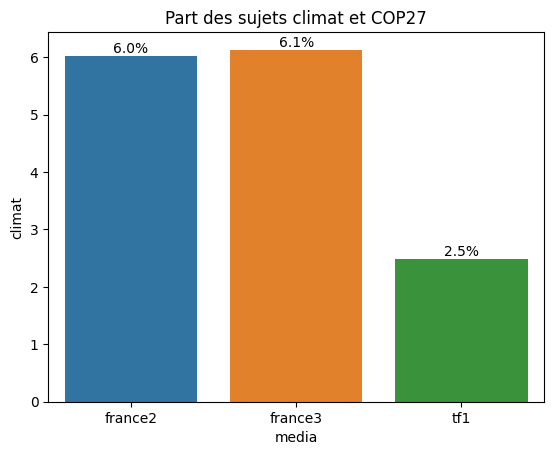

In [59]:
ax = sns.barplot(x='media', y='climat', 
                 data=(cop27.groupby('media').climat.mean() * 100).reset_index())
ax.bar_label(ax.containers[0], fmt="%.1f%%")
ax.set_title('Part des sujets climat et COP27')


<AxesSubplot:xlabel='date'>

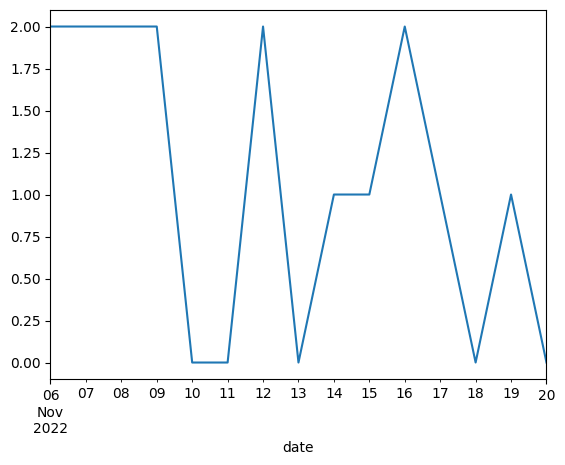

In [82]:
cop27[cop27['media'] == 'france3'].set_index('date').groupby(pd.Grouper(freq='1D')).climat.sum().plot()